## Introduction

##### Data

Forest Fire dataset.
Info at: [UCI Forest Fire Dataset](https://archive.ics.uci.edu/ml/datasets/forest+fires)

Source:

Paulo Cortez, pcortez '@' dsi.uminho.pt, Department of Information Systems, University of Minho, Portugal.
Aníbal Morais, araimorais '@' gmail.com, Department of Information Systems, University of Minho, Portugal.

Data Set Information:

In [Cortez and Morais, 2007], the output 'area' was first transformed with a ln(x+1) function.
Then, several Data Mining methods were applied. After fitting the models, the outputs were
post-processed with the inverse of the ln(x+1) transform. Four different input setups were
used. The experiments were conducted using a 10-fold (cross-validation) x 30 runs. Two
regression metrics were measured: MAD and RMSE. A Gaussian support vector machine (SVM) fed
with only 4 direct weather conditions (temp, RH, wind and rain) obtained the best MAD value:
12.71 +- 0.01 (mean and confidence interval within 95% using a t-student distribution). The
best RMSE was attained by the naive mean predictor. An analysis to the regression error curve
(REC) shows that the SVM model predicts more examples within a lower admitted error. In effect,
the SVM model predicts better small fires, which are the majority.

Attribute Information:

For more information, read [Cortez and Morais, 2007].
1. X - x-axis spatial coordinate within the Montesinho park map: 1 to 9
2. Y - y-axis spatial coordinate within the Montesinho park map: 2 to 9
3. month - month of the year: 'jan' to 'dec'
4. day - day of the week: 'mon' to 'sun'
5. FFMC - FFMC index from the FWI system: 18.7 to 96.20
6. DMC - DMC index from the FWI system: 1.1 to 291.3
7. DC - DC index from the FWI system: 7.9 to 860.6
8. ISI - ISI index from the FWI system: 0.0 to 56.10
9. temp - temperature in Celsius degrees: 2.2 to 33.30
10. RH - relative humidity in %: 15.0 to 100
11. wind - wind speed in km/h: 0.40 to 9.40
12. rain - outside rain in mm/m2 : 0.0 to 6.4
13. area - the burned area of the forest (in ha): 0.00 to 1090.84
(this output variable is very skewed towards 0.0, thus it may make
sense to model with the logarithm transform).


Relevant Papers:

[Cortez and Morais, 2007](http://www.dsi.uminho.pt/~pcortez/fires.pdf) P. Cortez and A. Morais. A Data Mining Approach to Predict Forest Fires using Meteorological Data. In J. Neves, M. F. Santos and J. Machado Eds., New Trends in Artificial Intelligence, Proceedings of the 13th EPIA 2007 - Portuguese Conference on Artificial Intelligence, December, Guimarães, Portugal, pp. 512-523, 2007. APPIA, ISBN-13 978-989-95618-0-9. Available at: [Web Link](http://www.dsi.uminho.pt/~pcortez/fires.pdf)


Citation Request:

This dataset is public available for research. The details are described in [Cortez and Morais, 2007](http://www.dsi.uminho.pt/~pcortez/fires.pdf).
Please include this citation if you plan to use this database:
[Cortez and Morais, 2007](http://www.dsi.uminho.pt/~pcortez/fires.pdf) P. Cortez and A. Morais. A Data Mining Approach to Predict Forest Fires using Meteorological Data. In J. Neves, M. F. Santos and J. Machado Eds., New Trends in Artificial Intelligence, Proceedings of the 13th EPIA 2007 - Portuguese Conference on Artificial Intelligence, December, Guimarães, Portugal, pp. 512-523, 2007. APPIA, ISBN-13 978-989-95618-0-9. Available at: [Web Link](http://www.dsi.uminho.pt/~pcortez/fires.pdf)


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier 
from sklearn import naive_bayes   
from sklearn.model_selection import GridSearchCV
#from xgboost import plot_importance
from sklearn import tree
#import graphviz
import seaborn as sns; 
sns.axes_style("whitegrid")
sns.set_context("paper")
np.random.seed(0)
import warnings 
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
warnings.filterwarnings("ignore")
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.manifold import TSNE
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE 
from sklearn.svm import SVR

In [2]:
df = pd.read_csv('forestfires.csv')

In [3]:
df.sample(5)

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
213,7,3,mar,mon,87.6,52.2,103.8,5.0,11.0,46,5.8,0.0,27.35
435,2,5,jul,sat,90.8,84.7,376.6,5.6,23.8,51,1.8,0.0,0.00
343,8,6,sep,mon,91.5,130.1,807.1,7.5,15.9,51,4.5,0.0,2.18
230,4,4,sep,wed,92.9,133.3,699.6,9.2,26.4,21,4.5,0.0,88.49
171,8,6,aug,wed,85.6,90.4,609.6,6.6,17.4,50,4.0,0.0,2.69


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


In [5]:
df.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


In [6]:
print("Non-zero values")
print(df.astype(bool).sum(axis=0))

Non-zero values
X        517
Y        517
month    517
day      517
FFMC     517
DMC      517
DC       517
ISI      516
temp     517
RH       517
wind     517
rain       8
area     270
dtype: int64


We see that we have a lot of zero values. Zero values are all the values where the area burned was less than 0.01 hectors. We have $517-270 = 247$ zeros in the column area which makes our data vert skewed towards left.

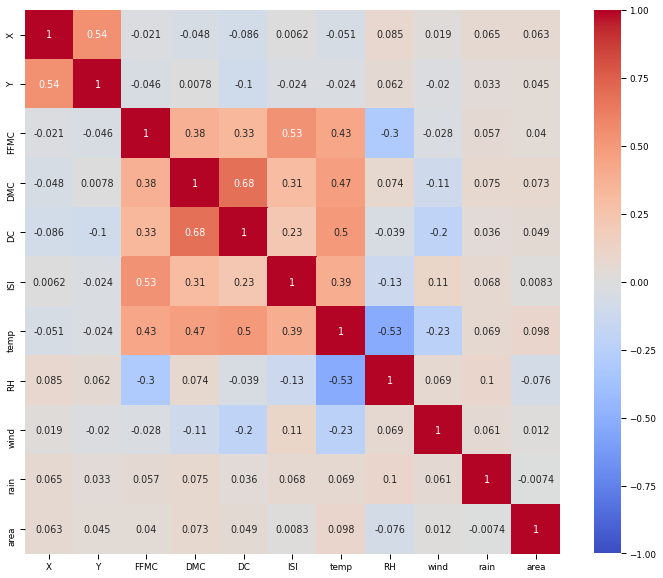

In [7]:
plt.figure(figsize=(12,10))
p=sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1,cmap ="coolwarm")

Visualizing the explanation power of our variables on each of the principal components.

In [8]:
area_acres = df[['area']]
area_acres = area_acres.apply(lambda x: 2.47105*x)
df['area_acres'] = area_acres
df.tail()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,area_acres
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,15.913562
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,134.153304
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,27.576918
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0.000000
516,6,3,nov,tue,79.5,3.0,106.7,1.1,11.8,31,4.5,0.0,0.00,0.000000


Encode fire_class_index using this

https://www.nwcg.gov/term/glossary/size-class-of-fire?fbclid=IwAR2F58sRg2prymrdkzphAwjPIIvokwD9ZgYqAGRMhcpkPeIhR7UuaiTvdIU


In [9]:
#Index for [A,B,C,D,E,F,G]
def get_fire_classes_index(area):
    if area <= 0.25:
        return 0
    elif area > 0.25 and area < 10:
        return 1
    elif area >=10 and area < 100:
        return 2
    elif area >=100 and area < 300:
        return 3
    elif area >= 300 and area < 1000:
        return 4
    elif area >=1000 and area < 5000:
        return 5
    else:
        return 6

fire_classes = ["A","B","C","D","E","F","G"]
df['fire_class_index'] = area_acres.apply(lambda e: get_fire_classes_index(e[0]), axis = 1)

df.tail()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,area_acres,fire_class_index
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,15.913562,2
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,134.153304,3
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,27.576918,2
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0.000000,0
516,6,3,nov,tue,79.5,3.0,106.7,1.1,11.8,31,4.5,0.0,0.00,0.000000,0


Now lets perform more encoding for columns like month, day, and area.

In [10]:
#Encode non-numericals
df["month"] = df["month"].astype('category')
df.dtypes
df["month_cat"] = df["month"].cat.codes
df["day"] = df["day"].astype('category')
df.dtypes
df["day_cat"] = df["day"].cat.codes
df.head()


df['area_bin'] = 1 
df.loc[df['area'] == 0.0, 'area_bin'] = 0
df.tail()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,area_acres,fire_class_index,month_cat,day_cat,area_bin
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,15.913562,2,1,3,1
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,134.153304,3,1,3,1
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,27.576918,2,1,3,1
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0.000000,0,1,2,0
516,6,3,nov,tue,79.5,3.0,106.7,1.1,11.8,31,4.5,0.0,0.00,0.000000,0,9,5,0


0    248
2    131
1    107
3     22
4      7
5      2
Name: fire_class_index, dtype: int64


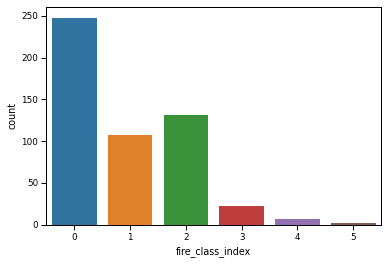

In [11]:
print(df['fire_class_index'].value_counts())
sns.countplot(x=df['fire_class_index'])
plt.show()

We see that a lot of our fires are of class A. Some of it are Class B and C. And, there are a lot of fires of class D, E and F.

We attempt to visualize temperature and DC in histograms based on the value of area_bin

In [12]:
from collections import defaultdict
dict_of_DC = defaultdict(list)
dict_of_temp = defaultdict(list)
dict_of_month = defaultdict(list)
dict_of_rain = defaultdict(list)
dict_of_wind = defaultdict(list)
dict_of_RH = defaultdict(list)
dict_of_X = defaultdict(list)
dict_of_Y = defaultdict(list)
dict_of_FFMC = defaultdict(list)
for row in df.iterrows():
    index = row[0]
    DC = row[1]['DC']
    temp = row[1]['temp']
    area_bin = row[1]['area_bin']
    month = row[1]['month_cat']
    rain = row[1]['rain']
    wind = row[1]['wind']
    RH = row[1]['RH']
    X = row[1]['X']
    Y = row[1]['Y']
    FFMC = row[1]['FFMC']
    
    dict_of_RH[area_bin].append(RH)
    dict_of_DC[area_bin].append(DC)
    dict_of_temp[area_bin].append(temp)
    dict_of_month[area_bin].append(month)
    dict_of_rain[area_bin].append(rain)
    dict_of_wind[area_bin].append(wind)
    dict_of_X[area_bin].append(X)
    dict_of_Y[area_bin].append(Y)
    dict_of_FFMC[area_bin].append(FFMC)



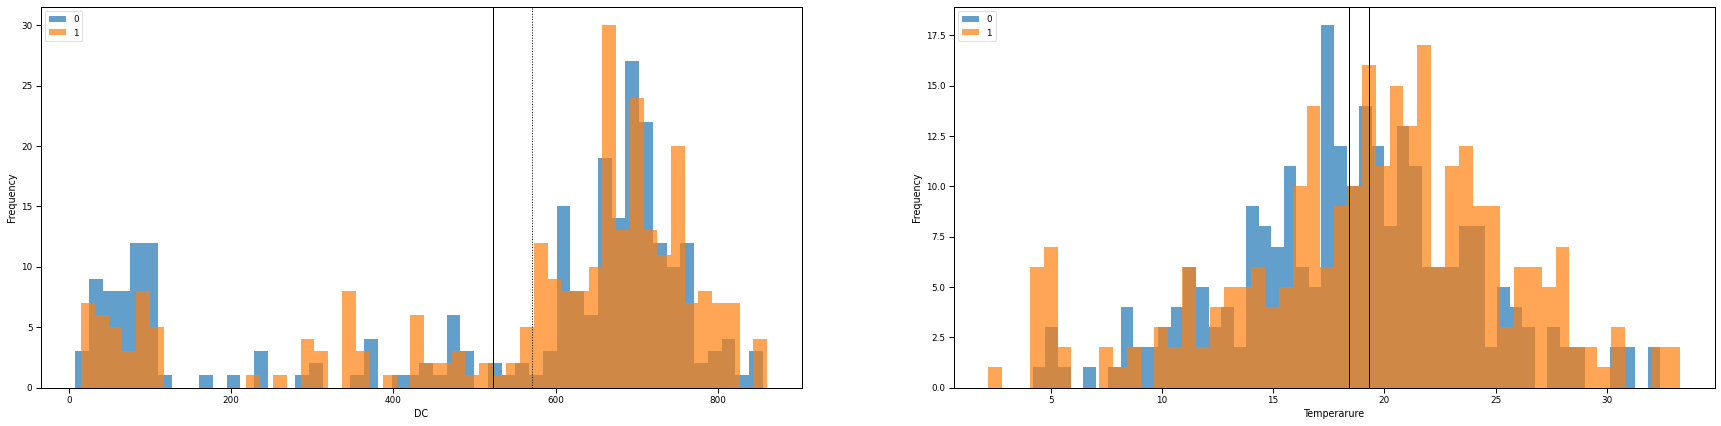

In [13]:
#Plotting histograms
import random
import numpy
from matplotlib import pyplot as plt
import statistics

f = plt.figure()
line = ['solid', 'dotted', 'dashed']

colors = ['violet', 'blue', 'green', 'yellow', 'orange', 'red']
f.add_subplot(1,2,1)
i = 0
for item in dict_of_DC:
    list_DC = []
    for value in dict_of_DC[item]:
        list_DC.append(value)
    
    plt.hist(list_DC, bins =50, alpha=0.7, label=item)
    plt.legend(loc='upper left')
    plt.xlabel("DC")
    plt.ylabel("Frequency")
    plt.axvline(statistics.mean(list_DC), color='k', linestyle=line[i], linewidth=1)
    i = i + 1
    
f.add_subplot(1,2,2)
i = 0
for item in dict_of_temp:
    list_temp = []
    for value in dict_of_temp[item]:
        list_temp.append(value)
    
    plt.hist(list_temp, bins =50, alpha=0.7, label=item)
    plt.legend(loc='upper left')
    plt.xlabel("Temperarure")
    plt.ylabel("Frequency")
    plt.axvline(statistics.mean(list_temp), color='k', linestyle=line[i], linewidth=1)
    
    
f.set_figheight(7)
f.set_figwidth(30)

Month count of forest fire of class:  A
-------------
aug    86
sep    75
mar    35
jul    14
oct    10
feb    10
jun     9
apr     5
jan     2
nov     1
may     1
dec     0
Name: month, dtype: int64
_________________________
Month count of forest fire of class:  B
-------------
aug    47
sep    37
jul     9
mar     6
jun     5
feb     2
apr     1
oct     0
nov     0
may     0
jan     0
dec     0
Name: month, dtype: int64
_________________________
Month count of forest fire of class:  C
-------------
sep    48
aug    38
mar    13
dec     9
jul     7
feb     7
oct     4
jun     2
apr     2
may     1
nov     0
jan     0
Name: month, dtype: int64
_________________________
Month count of forest fire of class:  D
-------------
aug    9
sep    8
oct    1
jun    1
jul    1
feb    1
apr    1
nov    0
may    0
mar    0
jan    0
dec    0
Name: month, dtype: int64
_________________________
Month count of forest fire of class:  E
-------------
sep    3
aug    3
jul    1
oct    0
nov    0
may    0


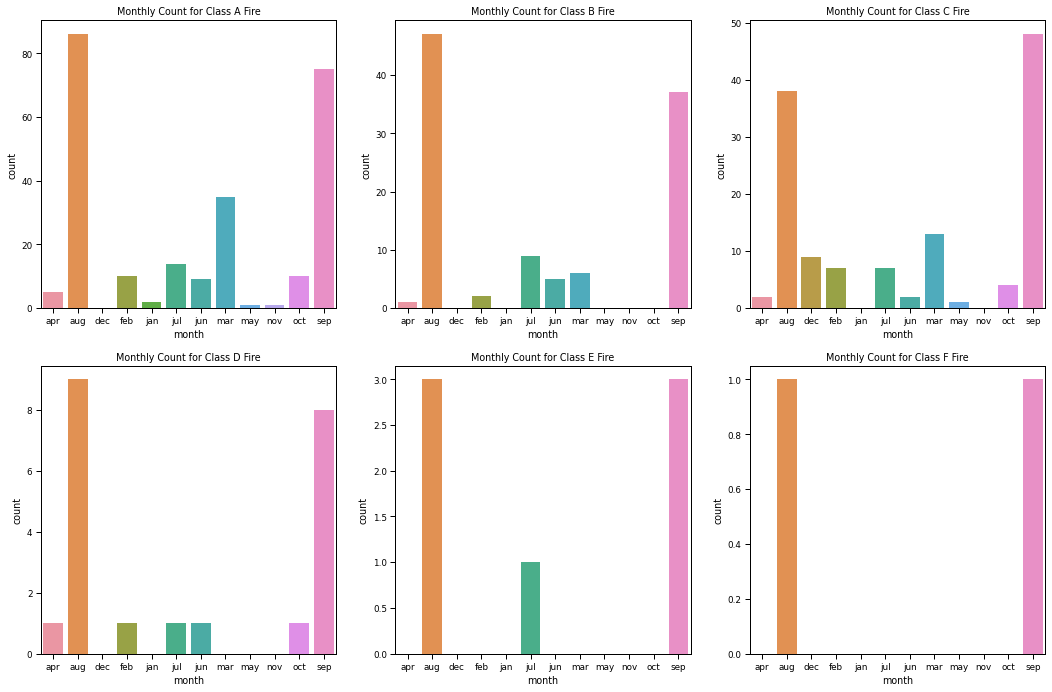

In [14]:
plt.figure(figsize=(18,18))
for i in range(0,6):
    plt.subplot(3,3,i+1)
    print("Month count of forest fire of class: ", fire_classes[i])
    print("-------------")
    print(df.loc[df['fire_class_index'] == i,'month'].value_counts())
    sns.countplot(x=df.loc[df['fire_class_index'] == i,'month']).set_title("Monthly Count for Class {} Fire".format(fire_classes[i]))
    print("_________________________")
plt.show()

We see that most of the fires were in August and September months and very few in January, May, and November.

Text(0.5, 1.0, 'Burnt area in different regions of the park with fire class')

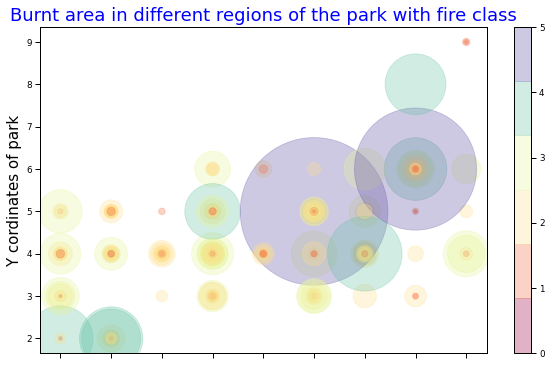

In [15]:
df.plot(kind = 'scatter', x = 'X', y='Y', c = df['fire_class_index'], s = 20*df['area'], figsize = (10,6), cmap=plt.cm.get_cmap('Spectral', 6), alpha= 0.3)
plt.xlabel('X cordinates of park',fontsize=15)
plt.ylabel('Y cordinates of park',fontsize=15)
plt.title('Burnt area in different regions of the park with fire class',color='blue',fontsize=18)

We see that most big fires are in close proximity to one another.

In [16]:
df.tail()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,area_acres,fire_class_index,month_cat,day_cat,area_bin
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,15.913562,2,1,3,1
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,134.153304,3,1,3,1
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,27.576918,2,1,3,1
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0.000000,0,1,2,0
516,6,3,nov,tue,79.5,3.0,106.7,1.1,11.8,31,4.5,0.0,0.00,0.000000,0,9,5,0


In [17]:
#prepare the data, split into train and test
X = df.drop(["area","day","month","area_acres","fire_class_index", "area_bin"],axis = 1)# input data
y = df["area_bin"] #target data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 0,shuffle=True)

sc=StandardScaler()
X_train_std=sc.fit_transform(X_train)
X_test_std=sc.transform(X_test)
class_names = np.unique(y_train)

### Dimensioanlity Reduction

Lets perform dimensionality reduction to see if we can find any immediate clusters.

We are coloring our observations based on our categorical variable area_bin. But with only 2 classes, LDA does not seem to work.

In [18]:
# #LDA
# from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
# lda = LDA(n_components=2)
# X_lda = lda.fit_transform(X_train_std, y_train)

# fig = plt.figure(figsize = (8.1,5),dpi=100)
# ax = fig.add_subplot(1,1,1) 
# ax.set_xlabel('LD1', fontsize = 15)
# ax.set_ylabel('LD2', fontsize = 15)
# for target in (class_names):
#     inn = (y_train == target).ravel()
#     ax.scatter(X_lda[inn,0],X_lda[inn,1],s=30)
# ax.legend(class_names)
# plt.show()

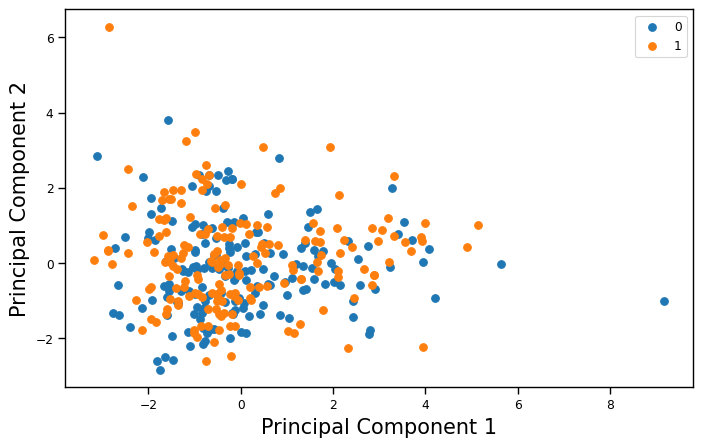

In [19]:
#PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train_std)
class_names = np.unique(y_train)

fig = plt.figure(figsize = (8.1,5),dpi=100)
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
targets = ['edm','post-rock','jazz','pop','r&b']
for target in (class_names):
    inn = (y_train == target).ravel()
    ax.scatter(X_pca[inn,0],X_pca[inn,1],s=30)
ax.legend(class_names)
plt.show()

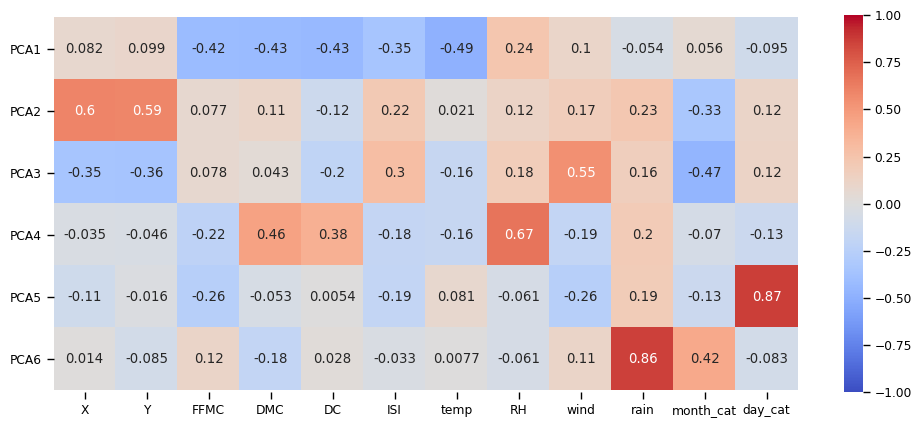

In [20]:
#view the strength of each feature onto the principal components
featuresAll = ['X','Y','FFMC','DMC','DC','ISI','temp','RH','wind','rain','month_cat','day_cat']
pca = PCA(n_components=6)
x_new = pca.fit_transform(X_train_std)
fig= plt.figure(figsize=(12,5),dpi=100)
ax = sns.heatmap(pca.components_,annot=True,cmap='coolwarm',
                 yticklabels=[ "PCA"+str(x) for x in range(1,pca.n_components_+1)],
                 xticklabels=list(featuresAll),vmin=-1,vmax=1)
plt.yticks(rotation=0);
ax.axis('equal');plt.show()

Looks like there is not any immediate clusters we can see.

### Regression Analysis

### We first attempt to fit a SVM regression on our dataset.

In [21]:
df2 = df.copy()

y = df2[['month']]
le = LabelEncoder()
le.fit(y)
classes = le.classes_
y_enc = le.transform(y)
df2['month'] = le.transform(y)

y = df2[['day']]
le = LabelEncoder()
le.fit(y)
classes = le.classes_
y_enc = le.transform(y)
df2['day'] = le.transform(y)

df2["month"] = df2["month"].astype('category')
df2["day"] = df2["day"].astype('category')

### Though PCA analysis recommends [temp, FFMC, DC] as the best features based on high variance on PCA1, mean square error is lower(though still mediocore) with [rain, month, wind] features. This is true for all our regression algorithms.  

In [22]:
#features = ["temp", "FFMC", "DC"]
features = ["rain", "month", "wind"]

X = df2[features]
y = df2['area']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0, shuffle=True)

sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)
class_names = np.unique(y_train)

svm_poly_reg = SVR(kernel="poly", degree=2, C=100, epsilon=4)
svm_poly_reg.fit(X_train, y_train)

y_pred = svm_poly_reg.predict(X_test)

print(mean_squared_error(y_test, y_pred))

8430.580903220654


In [23]:
from sklearn.svm import SVR
from sklearn.metrics import r2_score

gridSVR = GridSearchCV(estimator=SVR(kernel='poly'), param_grid={
            'C': [0.1, 10],
            'epsilon': [0.005, 1, 5, 10],
            'gamma': [0.1, 1, 3]
           }, cv=3, scoring='neg_mean_squared_error', verbose=0, n_jobs=-1)

gridSVR.fit(X_train_std, y_train);
print(gridSVR.best_estimator_)

y_pred = gridSVR.predict(X_test)
print(r2_score(y_test,y_pred))

SVR(C=10, epsilon=10, gamma=0.1, kernel='poly')
-0.008058539590080516


In [24]:
#features = ["temp", "FFMC", "DC"]
features = ["rain", "month", "wind"]

X = df2[features]
y = df2['area']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, shuffle=True)

sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.fit_transform(X_test)

xgb = XGBRegressor()
xgb.fit(X_train_std, y_train)

y_pred = xgb.predict(X_test_std)

print(r2_score(y_test, y_pred))
print(mean_squared_error(y_test, y_pred))

-0.02387887798420607
8425.110619514378


In [25]:
#features = ["temp", "FFMC", "DC"]
features = ["rain", "month", "wind"]

X = df2[features]
y = df2['area']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0, shuffle=True)

sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.fit_transform(X_test)

xgb = XGBRegressor()
parameters = {'nthread':[4],
              'objective':['reg:linear'],
              'learning_rate': [.03, 0.05, .07],
              'max_depth': [5, 6, 7],
              'min_child_weight': [4],
              'silent': [1],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [500]}

xgb_grid = GridSearchCV(xgb, parameters, cv = 2, scoring='neg_mean_squared_error', n_jobs = 5, verbose=True)
xgb_grid.fit(X_train_std, y_train)

y_pred = xgb_grid.predict(X_test_std)

print(r2_score(y_test, y_pred))
print(mean_squared_error(y_test, y_pred))

Fitting 2 folds for each of 9 candidates, totalling 18 fits
[21:28:04] WARNING: /Users/travis/build/dmlc/xgboost/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[21:28:04] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


-0.023968402470182726
8425.847282525725


## Classifiers using all the variables we have and area_bin as our Y variable

In [26]:
#prepare the data, split into train and test
X = df.drop(["area","day","month","area_acres","fire_class_index", "area_bin"],axis = 1)# input data
y = df["area_bin"] #target data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 0,shuffle=True)

sc=StandardScaler()
X_train_std=sc.fit_transform(X_train)
X_test_std=sc.transform(X_test)
class_names = np.unique(y_train)

In [27]:
#knn
param_grid = dict(n_neighbors=list(range(1, 31)))
clf = KNeighborsClassifier()
tree_cv = GridSearchCV(estimator=clf, param_grid = param_grid, scoring="accuracy", n_jobs=-1, verbose=1, cv=10)
tree_cv.fit(X_train_std, y_train)
best_params = tree_cv.best_params_
print(f"Best paramters: {best_params})")
#make confusion matrix
clf = KNeighborsClassifier(**best_params)
clf.fit(X_train_std, y_train)
y_pred = clf.predict(X_test_std)
#
acc_k = accuracy_score(y_test, y_pred)
cm_k = confusion_matrix(y_test, y_pred)
print(f"Validation accuracy:%3.3f"%acc_k)
k_cv = best_params['n_neighbors']
print(k_cv)


Fitting 10 folds for each of 30 candidates, totalling 300 fits
Best paramters: {'n_neighbors': 28})
Validation accuracy:0.500
28


In [28]:
#decision tree
#my best
#{'criterion': 'gini', 'max_depth': 8, 'min_samples_split': 2, 'n_estimators': 200} acc=0.630
param_grid = {
    "criterion":(["gini",'entropy']),
    "max_depth":([2,3]), 
    "min_samples_split":([10,20])
}
#Decision tree classifier
clf = DecisionTreeClassifier(random_state=0,criterion="gini")
tree_cv = GridSearchCV(estimator=clf, param_grid = param_grid, scoring="accuracy", n_jobs=-1, verbose=1, cv=10)
tree_cv.fit(X_train, y_train)
best_params = tree_cv.best_params_
print(f"Best paramters: {best_params})")
#make confusion matrix
clf_dt = DecisionTreeClassifier(**best_params,random_state=0)
clf_dt.fit(X_train, y_train)
y_pred = clf_dt.predict(X_test)
#
acc_dt = accuracy_score(y_test, y_pred)
cm_dt = confusion_matrix(y_test, y_pred)
print(f"Validation accuracy:%3.3f"%acc_dt)

Fitting 10 folds for each of 8 candidates, totalling 80 fits
Best paramters: {'criterion': 'gini', 'max_depth': 3, 'min_samples_split': 10})
Validation accuracy:0.583


In [29]:
features = ['X','Y','FFMC','DMC','DC','ISI','temp','RH','wind','rain','month_cat','day_cat']

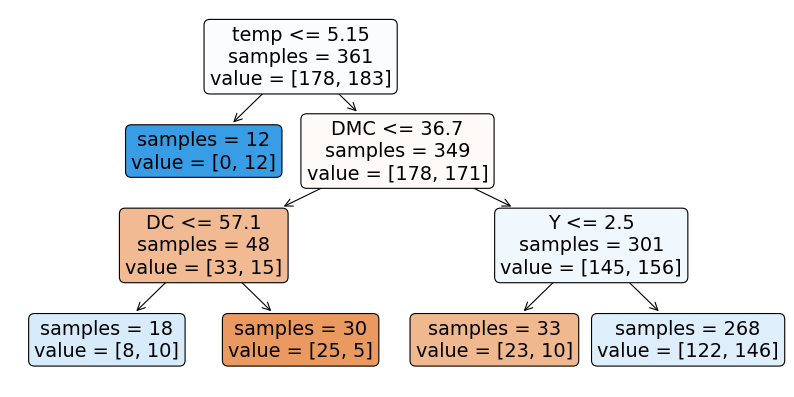

In [30]:
#decision tree 
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (10,5), dpi=100)
tree.plot_tree(clf_dt,
               feature_names = features, 
               #class_names=class_names,
               filled = True,rounded=True,impurity = False,proportion = False);
plt.show()

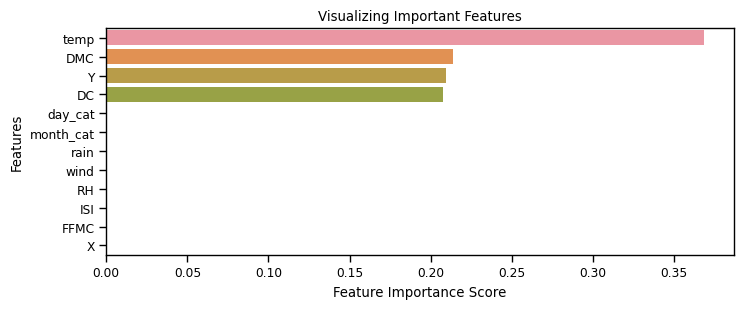

In [31]:
#plot feature importance barplot
feature_imp = pd.Series(clf_dt.feature_importances_,index=features).sort_values(ascending=False)
fig, ax = plt.subplots(figsize=(8.1, 3),dpi= 100)
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

In [32]:
featuresAll = ['X','Y','FFMC','DMC','DC','ISI','temp','RH','wind','rain','month_cat','day_cat']

In [33]:
print(X_test)

     X  Y  FFMC    DMC     DC   ISI  temp  RH  wind  rain  month_cat  day_cat
213  7  3  87.6   52.2  103.8   5.0  11.0  46   5.8   0.0          7        1
435  2  5  90.8   84.7  376.6   5.6  23.8  51   1.8   0.0          5        2
343  8  6  91.5  130.1  807.1   7.5  15.9  51   4.5   0.0         11        1
230  4  4  92.9  133.3  699.6   9.2  26.4  21   4.5   0.0         11        6
171  8  6  85.6   90.4  609.6   6.6  17.4  50   4.0   0.0          1        6
..  .. ..   ...    ...    ...   ...   ...  ..   ...   ...        ...      ...
26   7  4  92.4  117.9  668.0  12.2  19.0  34   5.8   0.0         11        0
208  6  5  92.4  117.9  668.0  12.2  19.6  33   6.3   0.0         11        0
4    8  6  89.3   51.3  102.2   9.6  11.4  99   1.8   0.0          7        3
331  7  4  91.2  124.4  795.3   8.5  21.5  28   4.5   0.0         11        2
196  6  5  81.5    9.1   55.2   2.7   5.8  54   5.8   0.0          0        4

[156 rows x 12 columns]


In [34]:
#Naive Bayes
gnb = naive_bayes.GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
print(acc)

0.4358974358974359


In [35]:
#random forest
#my best
#{'bootstrap': True, 'max_depth': 4, 'max_features': 2, 'min_samples_split': 5, 'n_estimators': 200}) %0.933
param_grid = {
    "n_estimators": [100,200,500],
    "max_depth":([4,5]),
    "min_samples_split":([5,10]),
    "bootstrap":(True,False),
    "max_features":[2,4]
}
#Random forest classifier
clf = RandomForestClassifier(random_state=0,criterion="gini")
#tree_cv = RandomizedSearchCV(estimator=clf, param_distributions=param_grid, n_iter = 40, scoring="accuracy", cv = 10, verbose=1, random_state=1, n_jobs=-1)
tree_cv = GridSearchCV(estimator=clf, param_grid = param_grid, scoring="accuracy", n_jobs=-1, verbose=1, cv=10)
tree_cv.fit(X_train, y_train)
best_params = tree_cv.best_params_
print(f"Best paramters: {best_params})")
#make confusion matrix
clf = RandomForestClassifier(**best_params,random_state=0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
#
acc_rf = accuracy_score(y_test, y_pred)
cm_rf = confusion_matrix(y_test, y_pred)
print(f"Validation accuracy:%3.3f"%acc_rf)

Fitting 10 folds for each of 48 candidates, totalling 480 fits
Best paramters: {'bootstrap': True, 'max_depth': 4, 'max_features': 2, 'min_samples_split': 10, 'n_estimators': 100})
Validation accuracy:0.558


## Classifiers using selective features and area_bin as our Y variable.

In [36]:
#Naive Bayes
#Trying different combinations to see which set of variables gives high accuracy
from itertools import combinations
comb = combinations(featuresAll, 3) 

for item in comb:
    X_threefeat_train = X_train[list(item)]
    
    
    gnb = naive_bayes.GaussianNB()
    gnb.fit(X_threefeat_train, y_train)
    

    X_threefeat_valid = X_test[list(item)]
    
    y_pred = gnb.predict(X_threefeat_valid)

    cm = confusion_matrix(y_test, y_pred)
    acc = accuracy_score(y_test, y_pred)
    
    
    if acc > 0.60:
        print(acc, item)

0.6153846153846154 ('X', 'DC', 'ISI')
0.6346153846153846 ('X', 'DC', 'RH')
0.6089743589743589 ('X', 'DC', 'wind')
0.6089743589743589 ('X', 'ISI', 'month_cat')
0.6025641025641025 ('FFMC', 'DC', 'temp')
0.6025641025641025 ('FFMC', 'RH', 'wind')
0.6346153846153846 ('DMC', 'DC', 'RH')
0.6089743589743589 ('DMC', 'DC', 'wind')
0.6153846153846154 ('DMC', 'DC', 'month_cat')
0.6346153846153846 ('DMC', 'DC', 'day_cat')
0.6089743589743589 ('DC', 'ISI', 'temp')
0.6089743589743589 ('DC', 'ISI', 'RH')
0.6282051282051282 ('DC', 'ISI', 'wind')
0.6089743589743589 ('DC', 'ISI', 'month_cat')
0.6153846153846154 ('DC', 'ISI', 'day_cat')
0.6217948717948718 ('DC', 'temp', 'RH')
0.6153846153846154 ('DC', 'RH', 'month_cat')
0.6153846153846154 ('DC', 'RH', 'day_cat')
0.6282051282051282 ('DC', 'month_cat', 'day_cat')
0.6282051282051282 ('ISI', 'temp', 'RH')


It can be seen that ('FFMC', 'DC', 'temp') give a high accuracy. Plus looking at the principal components and the deicision tree's "importance feature graph", these three variables stand out. Though they are mildly correlated, they seem to account for signficant explanation in our Y variable.

In [37]:
X = df[["temp", "FFMC","DC"]]
y = df["area_bin"] #target data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 0,shuffle=True)

sc=StandardScaler()
X_train_std=sc.fit_transform(X_train)
X_test_std=sc.transform(X_test)

In [38]:
#knn
param_grid = dict(n_neighbors=list(range(1, 31)))
clf = KNeighborsClassifier()
tree_cv = GridSearchCV(estimator=clf, param_grid = param_grid, scoring="accuracy", n_jobs=-1, verbose=1, cv=10)
tree_cv.fit(X_train_std, y_train)
best_params = tree_cv.best_params_
print(f"Best paramters: {best_params})")
#make confusion matrix
clf = KNeighborsClassifier(**best_params)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test_std)
#
acc_k = accuracy_score(y_test, y_pred)
cm_k = confusion_matrix(y_test, y_pred)
print(f"Validation accuracy:%3.3f"%acc_k)
k_cv = best_params['n_neighbors']
print(k_cv)


Fitting 10 folds for each of 30 candidates, totalling 300 fits
Best paramters: {'n_neighbors': 5})
Validation accuracy:0.558
5


In [39]:
#decision tree
#my best
#{'criterion': 'gini', 'max_depth': 8, 'min_samples_split': 2, 'n_estimators': 200} acc=0.630
param_grid = {
    "criterion":(["gini",'entropy']),
    "max_depth":([2,3]), 
    "min_samples_split":([10,20])
}
#Decision tree classifier
clf = DecisionTreeClassifier(random_state=0,criterion="gini")
tree_cv = GridSearchCV(estimator=clf, param_grid = param_grid, scoring="accuracy", n_jobs=-1, verbose=1, cv=10)
tree_cv.fit(X_train, y_train)
best_params = tree_cv.best_params_
print(f"Best paramters: {best_params})")
#make confusion matrix
clf_dt = DecisionTreeClassifier(**best_params,random_state=0)
clf_dt.fit(X_train, y_train)
y_pred = clf_dt.predict(X_test)
#
acc_dt = accuracy_score(y_test, y_pred)
cm_dt = confusion_matrix(y_test, y_pred)
print(f"Validation accuracy:%3.3f"%acc_dt)

Fitting 10 folds for each of 8 candidates, totalling 80 fits
Best paramters: {'criterion': 'entropy', 'max_depth': 2, 'min_samples_split': 10})
Validation accuracy:0.615


In [40]:
# SVM
from sklearn.svm import SVC  
# defining parameter range 
param_grid = {'C': [0.01,0.02,0.05,0.07,0.08,0.1,0.2,0.5,0.9,1,10,20],               
              'kernel': ['linear','poly']}  
grid = GridSearchCV(SVC(), param_grid, verbose = 0, cv=3, scoring='accuracy');
# fitting the model for grid search 
grid.fit(X_train_std, y_train);
svmBest = grid.best_estimator_
C_cv = grid.best_params_['C']
CscoreM = grid.cv_results_['mean_test_score']
CscoreS = grid.cv_results_['std_test_score']
svmBest = grid.best_estimator_
print(grid.best_estimator_) 

SVC(C=0.9, kernel='poly')


Accuracy is 0.6474358974358975


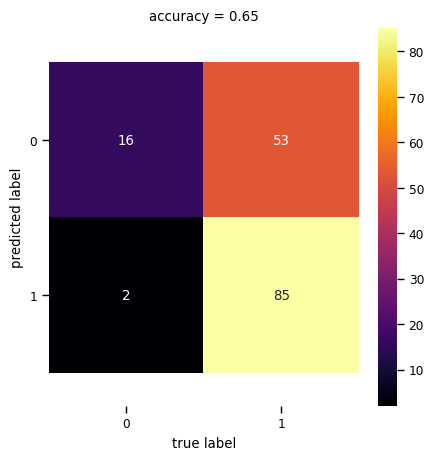

In [41]:
y_pred = svmBest.predict(X_test_std)
cm = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)

print('Accuracy is', acc)
#plot
fig, ax = plt.subplots(figsize=(5, 5),dpi= 100)
ax =sns.heatmap(cm,annot = True,cmap = "inferno")
plt.yticks(rotation=0)
plt.title('accuracy = %2.2f'%acc)
plt.xlabel('true label')
plt.ylabel('predicted label')
ax.axis('equal')
#ax.set_xticklabels([''] )
#ax.set_yticklabels([''] )
plt.show();


In [42]:
#random forest
#my best
#{'bootstrap': True, 'max_depth': 4, 'max_features': 2, 'min_samples_split': 5, 'n_estimators': 200}) %0.933
param_grid = {
    "n_estimators": [100,200,500],
    "max_depth":([4,5]),
    "min_samples_split":([5,10]),
    "bootstrap":(True,False),
    "max_features":[2,4]
}
#Random forest classifier
clf = RandomForestClassifier(random_state=0,criterion="gini")
#tree_cv = RandomizedSearchCV(estimator=clf, param_distributions=param_grid, n_iter = 40, scoring="accuracy", cv = 10, verbose=1, random_state=1, n_jobs=-1)
tree_cv = GridSearchCV(estimator=clf, param_grid = param_grid, scoring="accuracy", n_jobs=-1, verbose=1, cv=10)
tree_cv.fit(X_train, y_train)
best_params = tree_cv.best_params_
print(f"Best paramters: {best_params})")
#make confusion matrix
clf = RandomForestClassifier(**best_params,random_state=0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
#
acc_rf = accuracy_score(y_test, y_pred)
cm_rf = confusion_matrix(y_test, y_pred)
print(f"Validation accuracy:%3.3f"%acc_rf)

Fitting 10 folds for each of 48 candidates, totalling 480 fits
Best paramters: {'bootstrap': True, 'max_depth': 5, 'max_features': 2, 'min_samples_split': 10, 'n_estimators': 200})
Validation accuracy:0.551


Though using DecisionTree with area_bin as the Y variable, we get a decent accuracy of 61.5 %, it really does not make sense to be classifying whether an area is 0 or not. Rather using a pre-exisiting specification from National Wildfire Coordinating Group, we categorize areas into 6 categories in the variable fire_class_index.

### Classifiers using selective features and fire_class_index as our Y variable.

In [43]:
X = df[["temp", "FFMC","DC"]]
y = df["fire_class_index"] #target data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 0,shuffle=True)

sc=StandardScaler()
X_train_std=sc.fit_transform(X_train)
X_test_std=sc.transform(X_test)

In [44]:
#knn
param_grid = dict(n_neighbors=list(range(1, 31)))
clf = KNeighborsClassifier()
tree_cv = GridSearchCV(estimator=clf, param_grid = param_grid, scoring="accuracy", n_jobs=-1, verbose=1, cv=10)
tree_cv.fit(X_train_std, y_train)
best_params = tree_cv.best_params_
print(f"Best paramters: {best_params})")
#make confusion matrix
clf = KNeighborsClassifier(**best_params)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test_std)
#
acc_k = accuracy_score(y_test, y_pred)
cm_k = confusion_matrix(y_test, y_pred)
print(f"Validation accuracy:%3.3f"%acc_k)
k_cv = best_params['n_neighbors']
print(k_cv)


Fitting 10 folds for each of 30 candidates, totalling 300 fits
Best paramters: {'n_neighbors': 29})
Validation accuracy:0.442
29


In [45]:
#decision tree
#my best
#{'criterion': 'gini', 'max_depth': 8, 'min_samples_split': 2, 'n_estimators': 200} acc=0.630
param_grid = {
    "criterion":(["gini",'entropy']),
    "max_depth":([2,3]), 
    "min_samples_split":([10,20])
}
#Decision tree classifier
clf = DecisionTreeClassifier(random_state=0,criterion="gini")
tree_cv = GridSearchCV(estimator=clf, param_grid = param_grid, scoring="accuracy", n_jobs=-1, verbose=1, cv=10)
tree_cv.fit(X_train, y_train)
best_params = tree_cv.best_params_
print(f"Best paramters: {best_params})")
#make confusion matrix
clf_dt = DecisionTreeClassifier(**best_params,random_state=0)
clf_dt.fit(X_train, y_train)
y_pred = clf_dt.predict(X_test)
#
acc_dt = accuracy_score(y_test, y_pred)
cm_dt = confusion_matrix(y_test, y_pred)
print(f"Validation accuracy:%3.3f"%acc_dt)

Fitting 10 folds for each of 8 candidates, totalling 80 fits
Best paramters: {'criterion': 'entropy', 'max_depth': 3, 'min_samples_split': 20})
Validation accuracy:0.442


In [46]:
# SVM
from sklearn.svm import SVC  
# defining parameter range 
param_grid = {'C': [0.01,0.02,0.05,0.07,0.08,0.1,0.2,0.5,0.9,1,10,20],               
              'kernel': ['linear','poly']}  
grid = GridSearchCV(SVC(), param_grid, verbose = 0, cv=3, scoring='accuracy');
# fitting the model for grid search 
grid.fit(X_train_std, y_train);
svmBest = grid.best_estimator_
C_cv = grid.best_params_['C']
CscoreM = grid.cv_results_['mean_test_score']
CscoreS = grid.cv_results_['std_test_score']
svmBest = grid.best_estimator_
print(grid.best_estimator_) 

SVC(C=0.07, kernel='poly')


Accuracy is 0.42948717948717946


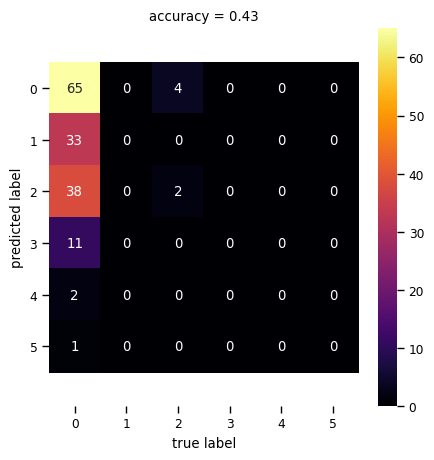

In [47]:
y_pred = svmBest.predict(X_test_std)
cm = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)

print('Accuracy is', acc)
#plot
fig, ax = plt.subplots(figsize=(5, 5),dpi= 100)
ax =sns.heatmap(cm,annot = True,cmap = "inferno")
plt.yticks(rotation=0)
plt.title('accuracy = %2.2f'%acc)
plt.xlabel('true label')
plt.ylabel('predicted label')
ax.axis('equal')
#ax.set_xticklabels([''] )
#ax.set_yticklabels([''] )
plt.show();


In [48]:
#random forest
#my best
#{'bootstrap': True, 'max_depth': 4, 'max_features': 2, 'min_samples_split': 5, 'n_estimators': 200}) %0.933
param_grid = {
    "n_estimators": [100,200,500],
    "max_depth":([4,5]),
    "min_samples_split":([5,10]),
    "bootstrap":(True,False),
    "max_features":[2,4]
}
#Random forest classifier
clf = RandomForestClassifier(random_state=0,criterion="gini")
#tree_cv = RandomizedSearchCV(estimator=clf, param_distributions=param_grid, n_iter = 40, scoring="accuracy", cv = 10, verbose=1, random_state=1, n_jobs=-1)
tree_cv = GridSearchCV(estimator=clf, param_grid = param_grid, scoring="accuracy", n_jobs=-1, verbose=1, cv=10)
tree_cv.fit(X_train, y_train)
best_params = tree_cv.best_params_
print(f"Best paramters: {best_params})")
#make confusion matrix
clf = RandomForestClassifier(**best_params,random_state=0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
#
acc_rf = accuracy_score(y_test, y_pred)
cm_rf = confusion_matrix(y_test, y_pred)
print(f"Validation accuracy:%3.3f"%acc_rf)

Fitting 10 folds for each of 48 candidates, totalling 480 fits
Best paramters: {'bootstrap': False, 'max_depth': 4, 'max_features': 2, 'min_samples_split': 5, 'n_estimators': 100})
Validation accuracy:0.436


In [49]:
### Classifiers based on 

Our data has a lot of small fires but a lot less big fires. The big fires are not outliers. Instead, they are extreme cases. Our classifier was able to predict nice for the more common cases but for when it comes to predicting more rare cases it struggles. We will use a technic called [oversampling](https://www.pewresearch.org/fact-tank/2016/10/25/oversampling-is-used-to-study-small-groups-not-bias-poll-results/#:~:text=Oversampling%20is%20the%20practice%20of,too%20small%20to%20report%20on.) to make our classifier more adept at classifying more extreme cases. In particular, we used SMOTE algorithm. We followed the following resources to learn more about it
- [tutorial link 1 ](https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/)
- [tutorial link 2](https://towardsdatascience.com/smote-for-imbalanced-datasets-with-python-30bfc211db42)
- [documentation](https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html)


One problem we ran across was we have 6 classes of forest fires (A,B,C,D,E,F) in our dataset. The number of instances were not enough to oversample over six different classes, thus we had to cut down our classes. This is how we merged two classes:
- A,B -> A
- C,D -> C
- E,F -> E

We chose this scheme in merging classes because according to this [scheme](https://www.nwcg.gov/term/glossary/size-class-of-fire?fbclid=IwAR2F58sRg2prymrdkzphAwjPIIvokwD9ZgYqAGRMhcpkPeIhR7UuaiTvdIU), looking at the area range merging two consecutive ones makes the most sense as areas will be closely packed. 

In [50]:
from imblearn.over_sampling import SMOTE, SMOTENC

In [51]:
df1 = df.copy()
df1['fire_class_index'] = df1['fire_class_index'].replace((1,3,5),(0,2,4))
df1.tail()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,area_acres,fire_class_index,month_cat,day_cat,area_bin
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,15.913562,2,1,3,1
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,134.153304,2,1,3,1
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,27.576918,2,1,3,1
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0.000000,0,1,2,0
516,6,3,nov,tue,79.5,3.0,106.7,1.1,11.8,31,4.5,0.0,0.00,0.000000,0,9,5,0


In [52]:
np.unique(df1['fire_class_index'])


array([0, 2, 4])

In [53]:
df1['fire_class_index'] = df1['fire_class_index'].replace((0,2,4),(0,1,2))
newClasses = ["A", "C", "E"]

In [54]:
np.unique(df1['fire_class_index'])

array([0, 1, 2])

### Classifiers using all features and fire_class_index as target variable with Smote Oversampling

In [55]:
X = df1.drop(["area","day","month","area_acres","fire_class_index", "area_bin"],axis = 1)# input data
y = df1["fire_class_index"] #target data

In [56]:
oversample  = SMOTE()
X_smote,y_smote = oversample.fit_resample(X, y)
#X_te_smote, y_te_smote = oversample.fit_resample(X_test, y_test)
# X_tr_smote,y_tr_smote = oversample.fit_resample(X_train, y_train)
# X_te_smote, y_te_smote = oversample.fit_resample(X_test, y_test)

In [57]:
# model = RandomForestClassifier()
# cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
# scores = cross_val_score(model, X_smote, y_smote, cv=cv, n_jobs=-1)
# print('Scores: ', scores , "\n Mean: ",np.mean(scores))
X_smote_train,X_smote_test,y_smote_train,y_smote_test = train_test_split(X_smote,y_smote,test_size = 0.3,random_state = 0,shuffle=True)

sc=StandardScaler()
X_smote_train_std=sc.fit_transform(X_smote_train)
X_smote_test_std=sc.transform(X_smote_test)
class_names = np.unique(y_smote_train)


In [58]:
#knn
param_grid = dict(n_neighbors=list(range(1, 31)))
clf = KNeighborsClassifier()
tree_cv = GridSearchCV(estimator=clf, param_grid = param_grid, scoring="accuracy", n_jobs=-1, verbose=1, cv=10)
tree_cv.fit(X_smote_train_std, y_smote_train)
best_params = tree_cv.best_params_
print(f"Best paramters: {best_params})")
#make confusion matrix
clf = KNeighborsClassifier(**best_params)
clf.fit(X_smote_train_std, y_smote_train)
y_pred = clf.predict(X_smote_test_std)
#
acc_k = accuracy_score(y_smote_test, y_pred)
cm_k = confusion_matrix(y_smote_test, y_pred)
print(f"Validation accuracy:%3.3f"%acc_k)
k_cv = best_params['n_neighbors']
print(k_cv)

Fitting 10 folds for each of 30 candidates, totalling 300 fits
Best paramters: {'n_neighbors': 1})
Validation accuracy:0.800
1


In [59]:
#decision tree
#my best
#{'criterion': 'gini', 'max_depth': 8, 'min_samples_split': 2, 'n_estimators': 200} acc=0.630
param_grid = {
    "criterion":(["gini",'entropy']),
    "max_depth":([2,3]), 
    "min_samples_split":([10,20])
}
#Decision tree classifier
clf = DecisionTreeClassifier(random_state=0,criterion="gini")
tree_cv = GridSearchCV(estimator=clf, param_grid = param_grid, scoring="accuracy", n_jobs=-1, verbose=1, cv=10)
tree_cv.fit(X_smote_train, y_smote_train)
best_params = tree_cv.best_params_
print(f"Best paramters: {best_params})")
#make confusion matrix
clf_dt = DecisionTreeClassifier(**best_params,random_state=0)
clf_dt.fit(X_smote_train, y_smote_train)
y_pred = clf_dt.predict(X_smote_test)
#
acc_dt = accuracy_score(y_smote_test, y_pred)
cm_dt = confusion_matrix(y_smote_test, y_pred)
print(f"Validation accuracy:%3.3f"%acc_dt)

Fitting 10 folds for each of 8 candidates, totalling 80 fits
Best paramters: {'criterion': 'gini', 'max_depth': 3, 'min_samples_split': 10})
Validation accuracy:0.550


In [60]:
#Naive Bayes
gnb = naive_bayes.GaussianNB()
gnb.fit(X_smote_train, y_smote_train)
y_pred = gnb.predict(X_smote_test)
cm = confusion_matrix(y_smote_test, y_pred)
acc = accuracy_score(y_smote_test, y_pred)
print(acc)

0.521875


In [61]:
#random forest
#my best
#{'bootstrap': True, 'max_depth': 4, 'max_features': 2, 'min_samples_split': 5, 'n_estimators': 200}) %0.933
param_grid = {
    "n_estimators": [100,200,500],
    "max_depth":([4,5]),
    "min_samples_split":([5,10]),
    "bootstrap":(True,False),
    "max_features":[2,4]
}
#Random forest classifier
clf = RandomForestClassifier(random_state=0,criterion="gini")
#tree_cv = RandomizedSearchCV(estimator=clf, param_distributions=param_grid, n_iter = 40, scoring="accuracy", cv = 10, verbose=1, random_state=1, n_jobs=-1)
tree_cv = GridSearchCV(estimator=clf, param_grid = param_grid, scoring="accuracy", n_jobs=-1, verbose=1, cv=10)
tree_cv.fit(X_smote_train, y_smote_train)
best_params = tree_cv.best_params_
print(f"Best paramters: {best_params})")
#make confusion matrix
clf = RandomForestClassifier(**best_params,random_state=0)
clf.fit(X_smote_train, y_smote_train)
y_pred = clf.predict(X_smote_test)
#
acc_rf = accuracy_score(y_smote_test, y_pred)
cm_rf = confusion_matrix(y_smote_test, y_pred)
print(f"Validation accuracy:%3.3f"%acc_rf)

Fitting 10 folds for each of 48 candidates, totalling 480 fits
Best paramters: {'bootstrap': True, 'max_depth': 5, 'max_features': 4, 'min_samples_split': 5, 'n_estimators': 200})
Validation accuracy:0.675


### Classifiers using selective features and area_fire_index as variable with Smote Oversampling

In [62]:
X = df1[['temp','FFMC','DC']]
# input data
y = df1["fire_class_index"] #target data
oversample  = SMOTE()
X_smote,y_smote = oversample.fit_resample(X, y)

In [63]:
X_smote_train,X_smote_test,y_smote_train,y_smote_test = train_test_split(X_smote,y_smote,test_size = 0.3,random_state = 0,shuffle=True)

sc=StandardScaler()
X_smote_train_std=sc.fit_transform(X_smote_train)
X_smote_test_std=sc.transform(X_smote_test)
class_names = np.unique(y_smote_train)


In [64]:
#knn
param_grid = dict(n_neighbors=list(range(1, 31)))
clf = KNeighborsClassifier()
tree_cv = GridSearchCV(estimator=clf, param_grid = param_grid, scoring="accuracy", n_jobs=-1, verbose=1, cv=10)
tree_cv.fit(X_smote_train_std, y_smote_train)
best_params = tree_cv.best_params_
print(f"Best paramters: {best_params})")
#make confusion matrix
clf = KNeighborsClassifier(**best_params)
clf.fit(X_smote_train_std, y_smote_train)
y_pred = clf.predict(X_smote_test_std)
#
acc_k = accuracy_score(y_smote_test, y_pred)
cm_k = confusion_matrix(y_smote_test, y_pred)
print(f"Validation accuracy:%3.3f"%acc_k)
k_cv = best_params['n_neighbors']
print(k_cv)

Fitting 10 folds for each of 30 candidates, totalling 300 fits
Best paramters: {'n_neighbors': 1})
Validation accuracy:0.697
1


In [65]:
#decision tree
#my best
#{'criterion': 'gini', 'max_depth': 8, 'min_samples_split': 2, 'n_estimators': 200} acc=0.630
param_grid = {
    "criterion":(["gini",'entropy']),
    "max_depth":([2,3]), 
    "min_samples_split":([10,20])
}
#Decision tree classifier
clf = DecisionTreeClassifier(random_state=0,criterion="gini")
tree_cv = GridSearchCV(estimator=clf, param_grid = param_grid, scoring="accuracy", n_jobs=-1, verbose=1, cv=10)
tree_cv.fit(X_smote_train, y_smote_train)
best_params = tree_cv.best_params_
print(f"Best paramters: {best_params})")
#make confusion matrix
clf_dt = DecisionTreeClassifier(**best_params,random_state=0)
clf_dt.fit(X_smote_train, y_smote_train)
y_pred = clf_dt.predict(X_smote_test)
#
acc_dt = accuracy_score(y_smote_test, y_pred)
cm_dt = confusion_matrix(y_smote_test, y_pred)
print(f"Validation accuracy:%3.3f"%acc_dt)

Fitting 10 folds for each of 8 candidates, totalling 80 fits
Best paramters: {'criterion': 'entropy', 'max_depth': 3, 'min_samples_split': 10})
Validation accuracy:0.553


In [66]:
#Naive Bayes
gnb = naive_bayes.GaussianNB()
gnb.fit(X_smote_train, y_smote_train)
y_pred = gnb.predict(X_smote_test)
cm = confusion_matrix(y_smote_test, y_pred)
acc = accuracy_score(y_smote_test, y_pred)
print(acc)

0.48125


In [67]:
#random forest
#my best
#{'bootstrap': True, 'max_depth': 4, 'max_features': 2, 'min_samples_split': 5, 'n_estimators': 200}) %0.933
param_grid = {
    "n_estimators": [100,200,500],
    "max_depth":([4,5]),
    "min_samples_split":([5,10]),
    "bootstrap":(True,False),
    "max_features":[2,4]
}
#Random forest classifier
clf = RandomForestClassifier(random_state=0,criterion="gini")
#tree_cv = RandomizedSearchCV(estimator=clf, param_distributions=param_grid, n_iter = 40, scoring="accuracy", cv = 10, verbose=1, random_state=1, n_jobs=-1)
tree_cv = GridSearchCV(estimator=clf, param_grid = param_grid, scoring="accuracy", n_jobs=-1, verbose=1, cv=10)
tree_cv.fit(X_smote_train, y_smote_train)
best_params = tree_cv.best_params_
print(f"Best paramters: {best_params})")
#make confusion matrix
clf = RandomForestClassifier(**best_params,random_state=0)
clf.fit(X_smote_train, y_smote_train)
y_pred = clf.predict(X_smote_test)
#
acc_rf = accuracy_score(y_smote_test, y_pred)
cm_rf = confusion_matrix(y_smote_test, y_pred)
print(f"Validation accuracy:%3.3f"%acc_rf)

Fitting 10 folds for each of 48 candidates, totalling 480 fits
Best paramters: {'bootstrap': True, 'max_depth': 5, 'max_features': 2, 'min_samples_split': 10, 'n_estimators': 500})
Validation accuracy:0.628
